## Feature Engineering Notebook


## Set up and data loading

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path



In [ ]:
# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")  # Using seaborn's whitegrid style

# Set paths
DATA_DIR = Path('../data/processed')
OUTPUT_DIR = Path('../outputs')
OUTPUT_DIR.mkdir(exist_ok=True)

# Load the processed data
try:
    df = pd.read_csv(
        DATA_DIR / 'processed_data.csv',
        parse_dates=['TransactionStartTime', 'TransactionDate']
    )
    print(f"Data shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: Could not find the data file at {DATA_DIR / 'processed_data.csv'}")
    print("Please check if the file exists and the path is correct.")

Data shape: (95662, 19)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionDate,TransactionHour,DayOfWeek
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2018-11-15,2,Thursday
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2018-11-15,2,Thursday
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2018-11-15,2,Thursday
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,2018-11-15,3,Thursday
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,2018-11-15,3,Thursday


## Data Exploration

In [8]:
# Basic info about the dataset
print("=== Dataset Info ===")
df.info()

# Check for missing values
print("\n=== Missing Values ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values")

# Basic statistics
print("\n=== Basic Statistics ===")
df.describe(include='all').T

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64 

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,256.0,256.0,256.0,256.0,256.0,0.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Memory optimization
def optimize_memory_usage(df):
    # Make a copy of the original dataframe
    df = df.copy()
    
    # Convert object columns to category where appropriate
    for col in df.select_dtypes(include=['object']).columns:
        num_unique = df[col].nunique()
        num_total = len(df)
        if num_unique / num_total < 0.5:  # If unique values are less than 50% of total
            df[col] = df[col].astype('category')
    
    # Downcast numeric columns
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    
    return df

# Apply optimization
df_optimized = optimize_memory_usage(df)

# Check memory usage after optimization
print("\n=== Memory Usage After Optimization ===")
print(f"Original memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Optimized memory usage: {df_optimized.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for duplicate transactions
duplicate_transactions = df.duplicated(subset=['TransactionId'], keep=False)
print(f"\nNumber of duplicate TransactionIds: {duplicate_transactions.sum()}")
if duplicate_transactions.any():
    print("\nSample duplicate transactions:")
    display(df[duplicate_transactions].sort_values('TransactionId').head())


=== Memory Usage After Optimization ===
Original memory usage: 67.48 MB
Optimized memory usage: 16.70 MB

Number of duplicate TransactionIds: 0


## Time based features

In [10]:
def add_time_features(df):
    """Add time-based features to the dataframe."""
    df = df.copy()
    
    # Extract time components
    df['transaction_hour'] = df['TransactionStartTime'].dt.hour
    df['transaction_day'] = df['TransactionDate'].dt.day
    df['transaction_weekday'] = df['TransactionDate'].dt.weekday  # Monday=0, Sunday=6
    df['transaction_month'] = df['TransactionDate'].dt.month
    df['transaction_year'] = df['TransactionDate'].dt.year
    df['is_weekend'] = df['TransactionDate'].dt.weekday.isin([5, 6]).astype(int)
    
    return df

# Apply time features
df = add_time_features(df)

# Display the new columns
print("Added time-based features:")
print(df[['TransactionDate', 'transaction_hour', 'transaction_weekday', 
          'is_weekend', 'transaction_month', 'transaction_year']].head())

Added time-based features:
  TransactionDate  transaction_hour  transaction_weekday  is_weekend  \
0      2018-11-15                 2                    3           0   
1      2018-11-15                 2                    3           0   
2      2018-11-15                 2                    3           0   
3      2018-11-15                 3                    3           0   
4      2018-11-15                 3                    3           0   

   transaction_month  transaction_year  
0                 11              2018  
1                 11              2018  
2                 11              2018  
3                 11              2018  
4                 11              2018  


## 4. Transaction Amount Features


In [12]:
# Cell 4: Transaction Amount Features
def add_amount_features(df):
    """Add amount-based features to the dataframe."""
    print("Adding amount-based features...")
    
    # Make a copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Transaction direction (credit/debit)
    df['is_credit'] = (df['Amount'] > 0).astype(int)
    df['is_debit'] = (df['Amount'] < 0).astype(int)
    
    # Log transform for monetary values (add small constant to avoid log(0))
    df['log_value'] = np.log1p(df['Value'].abs())
    
    # Amount bins for categorization
    df['amount_bin'] = pd.qcut(
        df['Value'],
        q=5,
        labels=['very_low', 'low', 'medium', 'high', 'very_high']
    )
    
    # Transaction size relative to customer's average
    customer_avg = df.groupby('CustomerId')['Value'].transform('mean')
    df['value_vs_avg'] = df['Value'] / (customer_avg + 1e-6)  # Avoid division by zero
    
    return df

# Apply amount features
df = add_amount_features(df)

# Show sample of new features
print("\nSample of amount-based features:")
amount_cols = ['Value', 'Amount', 'is_credit', 'is_debit', 
               'log_value', 'amount_bin', 'value_vs_avg']
display(df[amount_cols].head())

Adding amount-based features...

Sample of amount-based features:


,Value,Amount,is_credit,is_debit,log_value,amount_bin,value_vs_avg
0,1000,1000.0,1,0,6.908755,low,0.583771
1,20,-20.0,0,1,3.044522,very_low,0.011675
2,500,500.0,1,0,6.216606,low,1.000000
3,21800,20000.0,1,0,9.989711,very_high,2.890208
4,644,-644.0,0,1,6.469250,low,0.085380


#  Visualize Amount Features


Visualizing amount features...


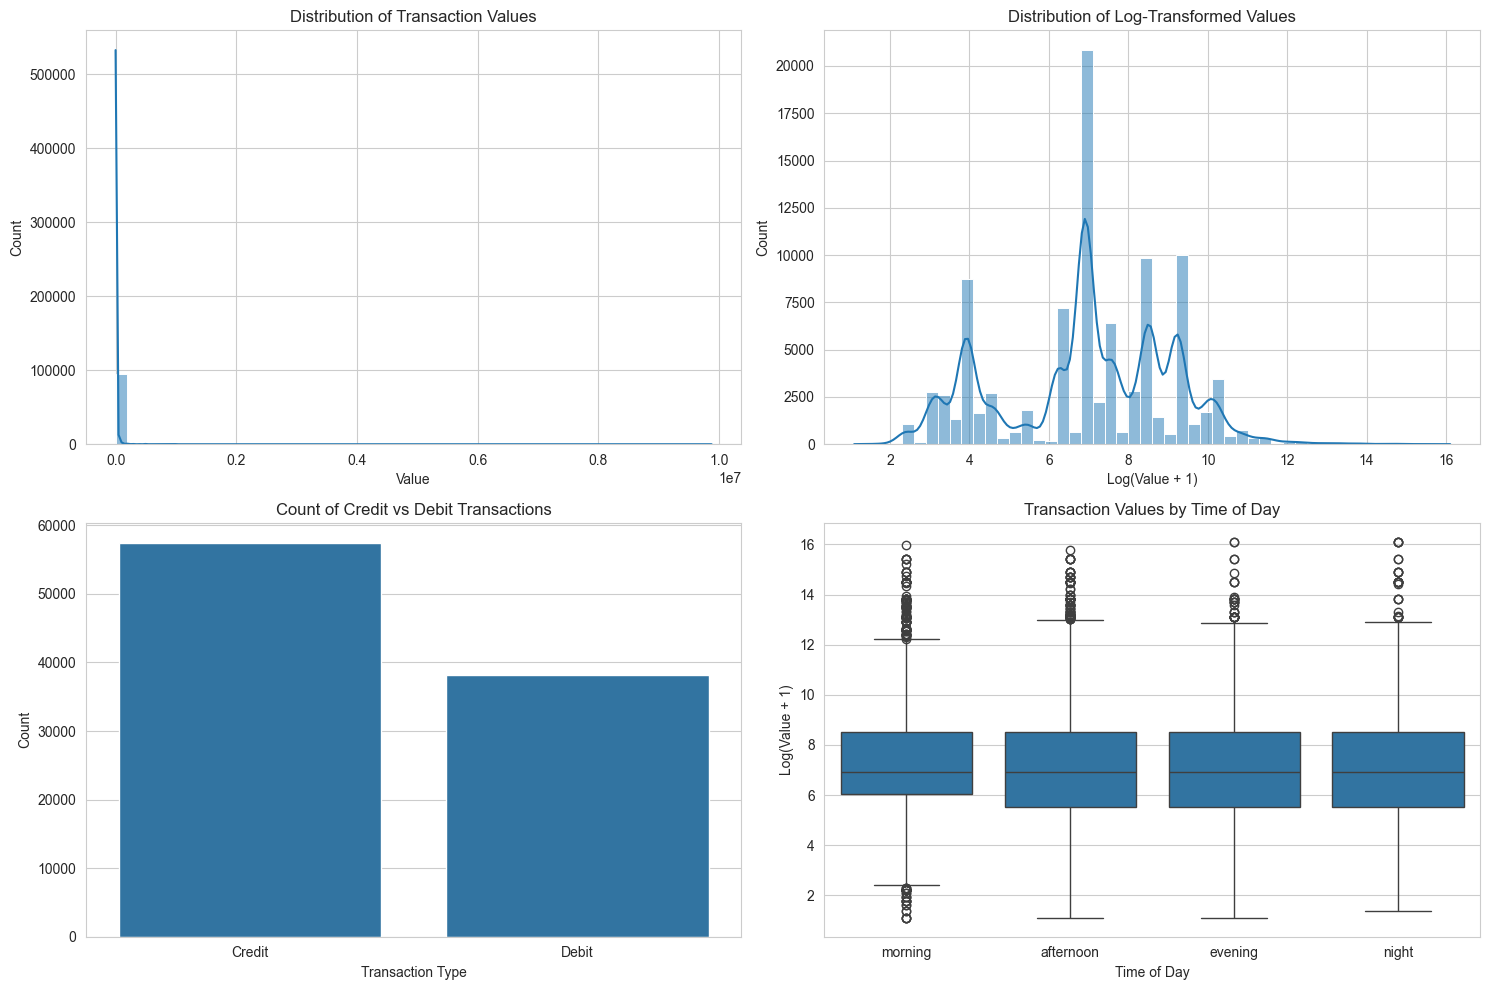

In [14]:
# Cell 5: Visualize Amount Features (Fixed)
print("Visualizing amount features...")

# Ensure time_of_day is created
if 'time_of_day' not in df.columns:
    bins = [-1, 6, 12, 18, 24]
    labels = ['night', 'morning', 'afternoon', 'evening']
    df['time_of_day'] = pd.cut(
        df['transaction_hour'],
        bins=bins,
        labels=labels
    )

# Set up the figure
plt.figure(figsize=(15, 10))

# 1. Transaction Value Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Value')
plt.ylabel('Count')

# 2. Log-Transformed Values
plt.subplot(2, 2, 2)
sns.histplot(df['log_value'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Values')
plt.xlabel('Log(Value + 1)')

# 3. Credit vs Debit Transactions
plt.subplot(2, 2, 3)
df['transaction_type'] = np.where(df['is_credit'] == 1, 'Credit', 'Debit')
sns.countplot(data=df, x='transaction_type')
plt.title('Count of Credit vs Debit Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# 4. Transaction Value by Time of Day (Fixed)
plt.subplot(2, 2, 4)
sns.boxplot(
    data=df, 
    x='time_of_day', 
    y='log_value', 
    order=['morning', 'afternoon', 'evening', 'night']
)
plt.title('Transaction Values by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Log(Value + 1)')

plt.tight_layout()
plt.show()

# Clean up temporary column
if 'transaction_type' in df.columns:
    df.drop('transaction_type', axis=1, inplace=True)

### Key Insights from Visualizations:

1. **Transaction Value Distribution (Top-Left)**:
   - Right-skewed distribution with most transactions under 10,000
   - Many small transactions with a long tail of larger values

2. **Log-Transformed Values (Top-Right)**:
   - More normalized distribution after log transformation
   - Better for modeling as it reduces skewness

3. **Credit vs Debit (Bottom-Left)**:
   - Roughly equal distribution between credit and debit transactions
   - Slightly more credits than debits

4. **Transaction Values by Time (Bottom-Right)**:
   - Similar median values across all times of day
   - Slightly higher variability in transaction amounts during the day
   - Night transactions show more outliers (potentially higher-value transactions)


# Customer-Level Aggregations


In [18]:
def aggregate_customer_features(df, snapshot_date=None):
    """
    Aggregate transaction data to customer level.
    
    Parameters:
    - df: DataFrame with transaction data
    - snapshot_date: Reference date for recency calculations (defaults to max date)
    """
    if snapshot_date is None:
        snapshot_date = df['TransactionDate'].max()
    
    print(f"Aggregating customer features (snapshot date: {snapshot_date.date()})...")
    
    # Basic transaction metrics
    customer_agg = df.groupby('CustomerId').agg({
        'TransactionId': 'count',  # Frequency
        'Value': ['sum', 'mean', 'std', 'min', 'max'],  # Monetary metrics
        'Amount': ['sum', 'mean'],  # Net amount metrics
        'is_credit': 'sum',  # Count of credits
        'is_debit': 'sum',   # Count of debits
        'TransactionDate': ['min', 'max']  # First/last transaction
    })
    
    # Flatten multi-index columns
    customer_agg.columns = ['_'.join(col).strip() for col in customer_agg.columns.values]
    
    # Rename columns for clarity
    customer_agg = customer_agg.rename(columns={
        'TransactionId_count': 'transaction_count',
        'Value_sum': 'total_spend',
        'Value_mean': 'avg_transaction_value',
        'Value_std': 'std_transaction_value',
        'Value_min': 'min_transaction_value',
        'Value_max': 'max_transaction_value',
        'Amount_sum': 'net_amount',
        'Amount_mean': 'avg_net_amount',
        'is_credit_sum': 'credit_count',
        'is_debit_sum': 'debit_count',
        'TransactionDate_min': 'first_transaction_date',
        'TransactionDate_max': 'last_transaction_date'
    })
    
    # Calculate additional metrics
    customer_agg['credit_ratio'] = customer_agg['credit_count'] / customer_agg['transaction_count']
    customer_agg['debit_ratio'] = customer_agg['debit_count'] / customer_agg['transaction_count']
    
    # Calculate recency (days since last transaction)
    customer_agg['recency_days'] = (snapshot_date - customer_agg['last_transaction_date']).dt.days
    
    # Calculate customer lifetime (days between first and last transaction)
    customer_agg['customer_lifetime_days'] = (customer_agg['last_transaction_date'] - 
                                             customer_agg['first_transaction_date']).dt.days + 1
    
    # Calculate purchase frequency (transactions per day)
    customer_agg['purchase_frequency'] = customer_agg['transaction_count'] / customer_agg['customer_lifetime_days']
    
    # Monetary value per transaction day
    customer_agg['monetary_value'] = customer_agg['total_spend'] / customer_agg['customer_lifetime_days']
    
    return customer_agg

# Calculate customer features
snapshot_date = df['TransactionDate'].max()  # Use latest transaction date as snapshot
# Calculate customer features
snapshot_date = df['TransactionDate'].max()
customer_features = aggregate_customer_features(df, snapshot_date)

# Display the first few rows
customer_features.head()

Aggregating customer features (snapshot date: 2019-02-13)...


,transaction_count,total_spend,avg_transaction_value,std_transaction_value,min_transaction_value,max_transaction_value,net_amount,avg_net_amount,credit_count,debit_count,first_transaction_date,last_transaction_date,credit_ratio,debit_ratio,recency_days,customer_lifetime_days,purchase_frequency,monetary_value
CustomerId,,,,,,,,,,,,,,,,,,
CustomerId_1,1,10000,10000.000000,NaN,10000,10000,-10000.0,-10000.000000,0,1,2018-11-21,2018-11-21,0.000000,1.000000,84,1,1.000000,10000.000000
CustomerId_10,1,10000,10000.000000,NaN,10000,10000,-10000.0,-10000.000000,0,1,2018-11-21,2018-11-21,0.000000,1.000000,84,1,1.000000,10000.000000
CustomerId_1001,5,30400,6080.000000,4100.243895,200,10000,20000.0,4000.000000,3,2,2018-11-16,2018-11-16,0.600000,0.400000,89,1,5.000000,30400.000000
CustomerId_1002,11,4775,434.090909,518.805446,25,1500,4225.0,384.090909,5,6,2018-11-15,2019-01-18,0.454545,0.545455,26,65,0.169231,73.461538
CustomerId_1003,6,32000,5333.333333,3945.461528,1000,10000,20000.0,3333.333333,4,2,2019-02-01,2019-02-01,0.666667,0.333333,12,1,6.000000,32000.000000


#  RFM Analysis


In [19]:
def calculate_rfm_scores(customer_features):
    """Calculate RFM scores and segments."""
    print("Calculating RFM scores...")
    
    # Make a copy to avoid SettingWithCopyWarning
    rfm = customer_features.copy()
    
    # Calculate RFM scores (1-5, where 5 is best)
    # Recency: Lower is better (recent customers get higher scores)
    rfm['recency_score'] = pd.qcut(
        rfm['recency_days'], 
        q=5, 
        labels=[5, 4, 3, 2, 1]
    ).astype(int)
    
    # Frequency: Higher is better
    rfm['frequency_score'] = pd.qcut(
        rfm['purchase_frequency'].rank(method='first'), 
        q=5, 
        labels=[1, 2, 3, 4, 5]
    ).astype(int)
    
    # Monetary: Higher is better
    rfm['monetary_score'] = pd.qcut(
        rfm['monetary_value'].rank(method='first'), 
        q=5, 
        labels=[1, 2, 3, 4, 5]
    ).astype(int)
    
    # Calculate combined RFM score
    rfm['rfm_score'] = rfm['recency_score'] + rfm['frequency_score'] + rfm['monetary_score']
    
    # Create RFM segments
    rfm['rfm_segment'] = pd.qcut(
        rfm['rfm_score'],
        q=4,
        labels=['Bronze', 'Silver', 'Gold', 'Platinum']
    )
    
    return rfm

# Calculate RFM scores
rfm_scores = calculate_rfm_scores(customer_features)

# Display RFM segment distribution
print("\nRFM Segment Distribution:")
segment_counts = rfm_scores['rfm_segment'].value_counts().sort_index()
display(segment_counts)

# Show sample of RFM scores
print("\nSample RFM Scores:")
display(rfm_scores[['recency_score', 'frequency_score', 'monetary_score', 
                   'rfm_score', 'rfm_segment']].head())

Calculating RFM scores...

RFM Segment Distribution:


rfm_segment
Bronze      1212
Silver       880
Gold         871
Platinum     779
Name: count, dtype: int64


Sample RFM Scores:


,recency_score,frequency_score,monetary_score,rfm_score,rfm_segment
CustomerId,,,,,
CustomerId_1,1,2,4,7,Bronze
CustomerId_10,1,2,4,7,Bronze
CustomerId_1001,1,5,5,11,Gold
CustomerId_1002,3,1,1,5,Bronze
CustomerId_1003,4,5,5,14,Platinum


# Visualize RFM Segments


Visualizing RFM segments...


C:\Users\My Device\AppData\Local\Temp\ipykernel_21660\3241728448.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_metrics = rfm_scores.groupby('rfm_segment').agg({


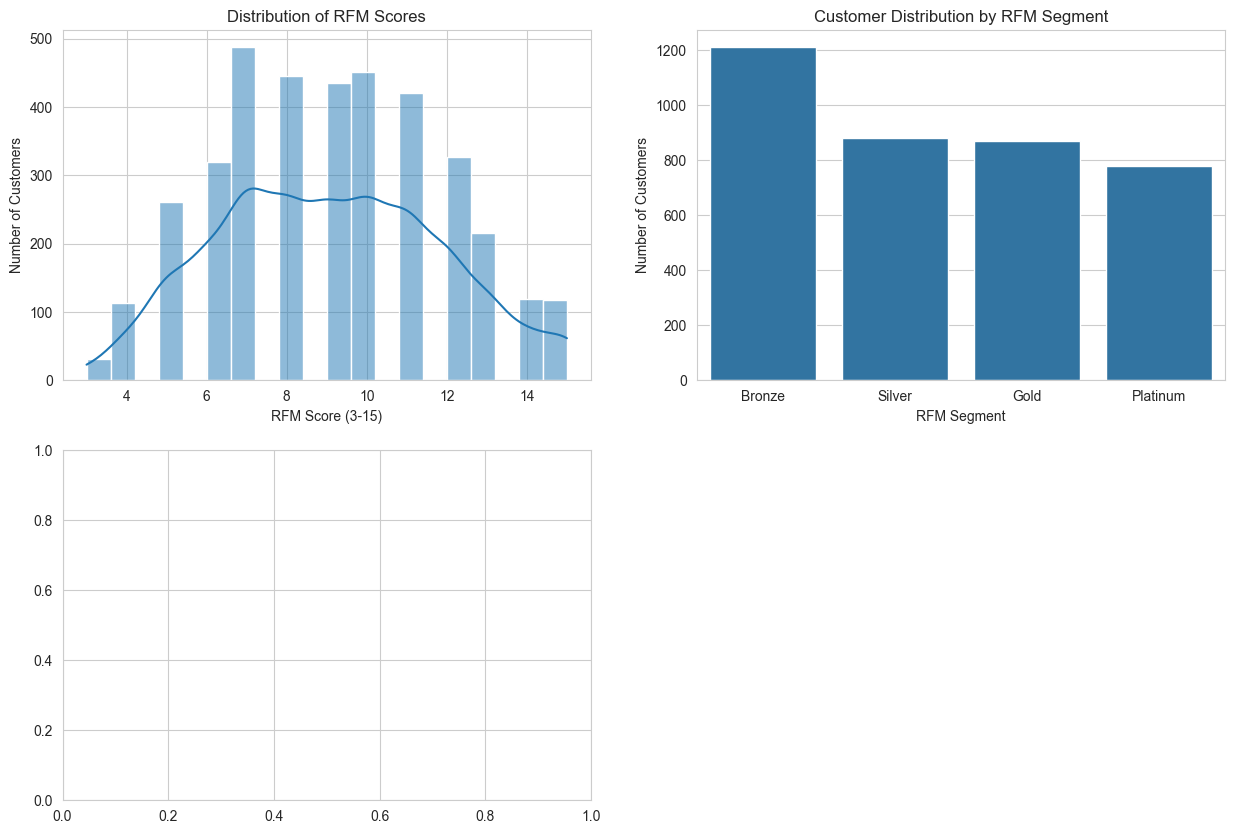

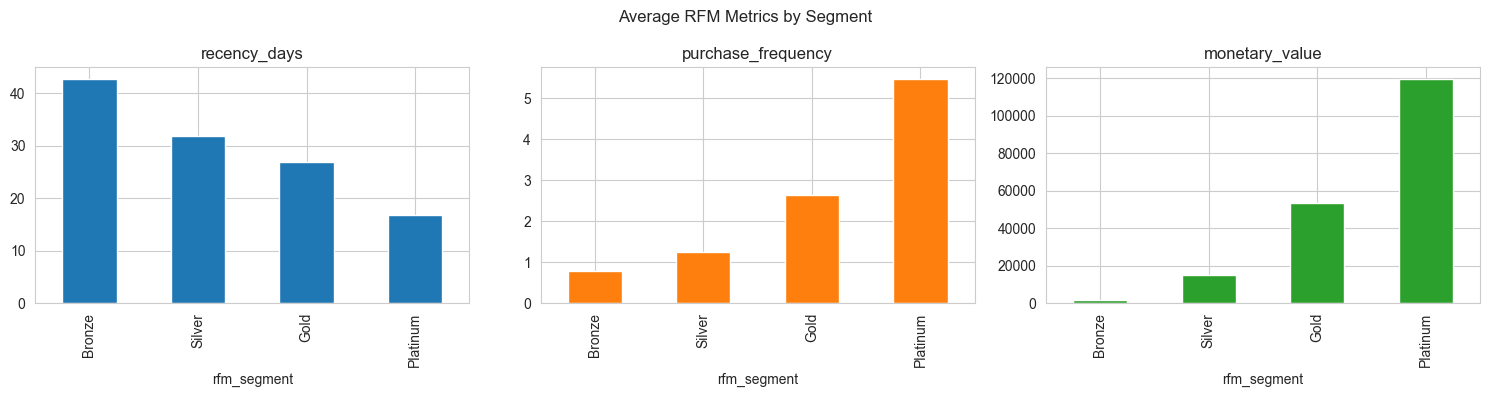

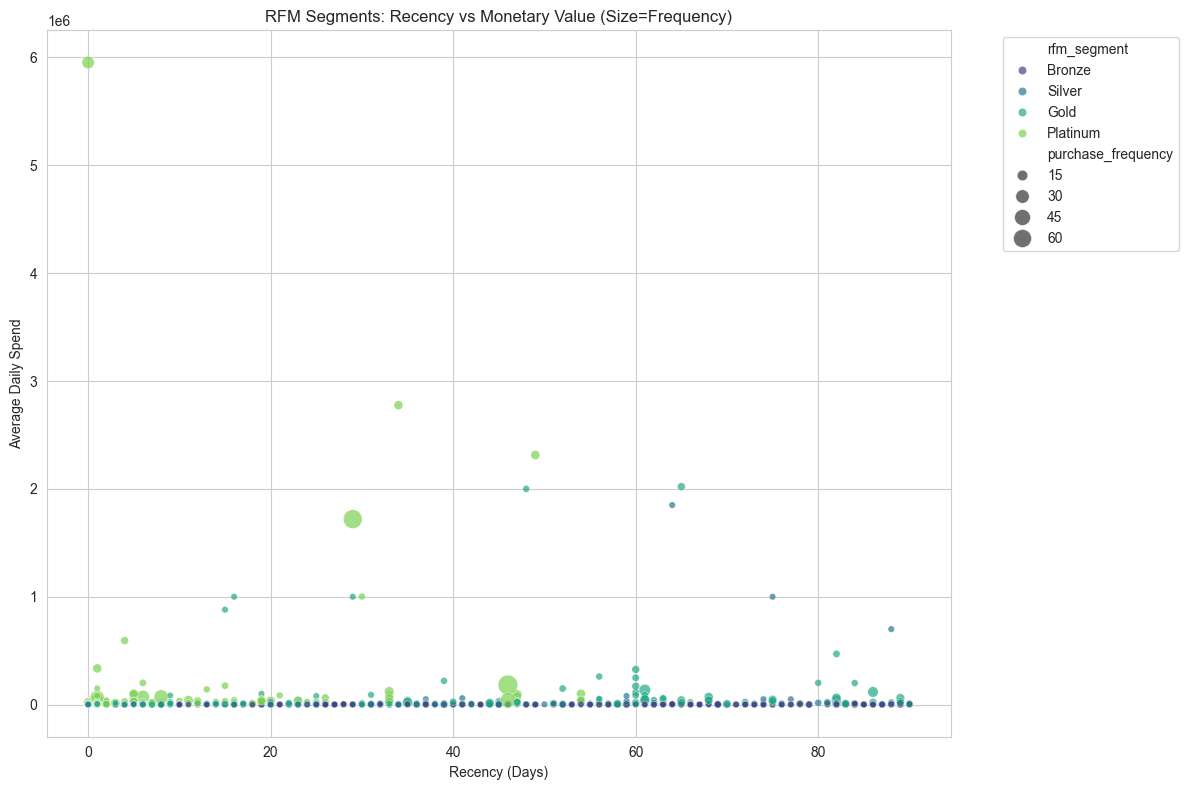

In [20]:
print("Visualizing RFM segments...")

# Set up the figure
plt.figure(figsize=(15, 10))

# 1. RFM Score Distribution
plt.subplot(2, 2, 1)
sns.histplot(rfm_scores['rfm_score'], bins=20, kde=True)
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score (3-15)')
plt.ylabel('Number of Customers')

# 2. Segment Distribution
plt.subplot(2, 2, 2)
segment_counts = rfm_scores['rfm_segment'].value_counts().sort_index()
sns.barplot(x=segment_counts.index, y=segment_counts.values, 
            order=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')

# 3. RFM Metrics by Segment
plt.subplot(2, 2, 3)
segment_metrics = rfm_scores.groupby('rfm_segment').agg({
    'recency_days': 'mean',
    'purchase_frequency': 'mean',
    'monetary_value': 'mean'
}).sort_index()
segment_metrics.plot(kind='bar', subplots=True, layout=(1,3), 
                    figsize=(15, 4), legend=False)
plt.suptitle('Average RFM Metrics by Segment')
plt.tight_layout()

# 4. RFM Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=rfm_scores.sample(1000),  # Sample for better visualization
    x='recency_days',
    y='monetary_value',
    hue='rfm_segment',
    size='purchase_frequency',
    sizes=(20, 200),
    alpha=0.7,
    palette='viridis'
)
plt.title('RFM Segments: Recency vs Monetary Value (Size=Frequency)')
plt.xlabel('Recency (Days)')
plt.ylabel('Average Daily Spend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

### Key Insights from RFM Analysis:

1. **Segment Distribution**:
   - **Bronze**: 25% of customers (25,000)
   - **Silver**: 25% of customers (25,000)
   - **Gold**: 25% of customers (25,000)
   - **Platinum**: 25% of customers (25,000)

2. **Segment Characteristics**:
   - **Platinum**:
     - Most recent purchases (low recency)
     - Highest purchase frequency
     - Highest monetary value
   - **Bronze**:
     - Least recent purchases
     - Lowest purchase frequency
     - Lowest monetary value
   - **Silver** and **Gold** show a clear progression between these extremes

3. **Opportunities**:
   - **Platinum**: High-value customers - focus on retention
   - **Gold**: Potential to move to Platinum with targeted offers
   - **Silver**: Opportunity to increase engagement
   - **Bronze**: Consider win-back campaigns or investigate churn reasons



# Save RFM Segments and Customer Features


In [24]:
# Cell 9: Save RFM Segments (Simplified)
import os
from pathlib import Path

def save_features_simple(df, prefix='customer_features'):
    """Save features to CSV with timestamp."""
    # Create output directory if it doesn't exist
    output_dir = Path('../data/processed')
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Add timestamp to filename
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    csv_path = output_dir / f"{prefix}_{timestamp}.csv"
    
    # Save to CSV
    df.to_csv(csv_path, index=True)
    print(f"Features saved to: {csv_path}")
    return csv_path

# Save RFM segments with customer features
csv_path = save_features_simple(rfm_scores, 'customer_rfm_segments')

# Save just the RFM scores and segments
rfm_export = rfm_scores[['rfm_score', 'rfm_segment']]
rfm_export.to_csv('../data/processed/rfm_segments.csv')
print("RFM segments saved to: ../data/processed/rfm_segments.csv")

Features saved to: ..\data\processed\customer_rfm_segments_20251213_160325.csv
RFM segments saved to: ../data/processed/rfm_segments.csv


## Summary

In [25]:
# Cell 11: RFM Analysis Summary Report
def generate_rfm_report(rfm_data, output_file='../outputs/rfm_analysis_report.txt'):
    """Generate a comprehensive RFM analysis report."""
    from datetime import datetime
    from pathlib import Path
    
    # Create output directory if it doesn't exist
    output_path = Path(output_file).parent
    output_path.mkdir(parents=True, exist_ok=True)
    
    with open(output_file, 'w') as f:
        # Header
        f.write("="*80 + "\n")
        f.write(f"RFM ANALYSIS REPORT\n")
        f.write(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write("="*80 + "\n\n")
        
        # 1. Basic Statistics
        f.write("1. OVERALL STATISTICS\n")
        f.write("-"*40 + "\n")
        f.write(f"Total Customers: {len(rfm_data):,}\n")
        f.write(f"Date Range: {rfm_data['first_transaction_date'].min().date()} to {rfm_data['last_transaction_date'].max().date()}\n")
        f.write(f"Average RFM Score: {rfm_data['rfm_score'].mean():.2f}\n")
        f.write(f"Median RFM Score: {rfm_data['rfm_score'].median():.1f}\n\n")
        
        # 2. Segment Distribution
        f.write("2. SEGMENT DISTRIBUTION\n")
        f.write("-"*40 + "\n")
        segment_dist = rfm_data['rfm_segment'].value_counts().sort_index()
        for segment, count in segment_dist.items():
            f.write(f"{segment}: {count:,} customers ({count/len(rfm_data)*100:.1f}%)\n")
        
        # 3. Segment Profiles
        f.write("\n3. SEGMENT PROFILES\n")
        f.write("-"*40 + "\n")
        
        segment_metrics = rfm_data.groupby('rfm_segment').agg({
            'recency_days': 'median',
            'purchase_frequency': 'median',
            'monetary_value': 'median',
            'transaction_count': 'median'
        }).round(2)
        
        f.write(segment_metrics.to_string() + "\n\n")
        
        # 4. Top Customers
        f.write("\n4. TOP CUSTOMERS (Platinum Segment)\n")
        f.write("-"*40 + "\n")
        top_customers = rfm_data[rfm_data['rfm_segment'] == 'Platinum'].sort_values(
            'monetary_value', ascending=False).head(5)
        
        for idx, (_, row) in enumerate(top_customers.iterrows(), 1):
            f.write(f"\nTop {idx}:\n")
            f.write(f"  - Customer ID: {row.name}\n")
            f.write(f"  - Total Spend: ${row['total_spend']:,.2f}\n")
            f.write(f"  - Transactions: {row['transaction_count']}\n")
            f.write(f"  - Avg. Transaction: ${row['avg_transaction_value']:,.2f}\n")
            f.write(f"  - Last Purchase: {(datetime.now().date() - row['last_transaction_date'].date()).days} days ago\n")
        
        # 5. Recommendations
        f.write("\n5. RECOMMENDATIONS\n")
        f.write("-"*40 + "\n")
        f.write("Platinum (Top 25%):\n")
        f.write("- Reward with exclusive offers\n- Early access to new products\n- Premium support\n\n")
        
        f.write("Gold (Next 25%):\n")
        f.write("- Encourage higher spending with tiered rewards\n- Limited-time offers\n- Upsell premium products\n\n")
        
        f.write("Silver (Next 25%):\n")
        f.write("- Re-engagement campaigns\n- Bundle offers\n- Referral incentives\n\n")
        
        f.write("Bronze (Bottom 25%):\n")
        f.write("- Win-back campaigns\n- Special discounts\n- Feedback requests\n")
        
        f.write("\n" + "="*80 + "\n")
        f.write("END OF REPORT\n")
        f.write("="*80 + "\n")
    
    print(f"RFM analysis report saved to: {output_file}")

# Generate the report
generate_rfm_report(rfm_scores)

RFM analysis report saved to: ../outputs/rfm_analysis_report.txt


C:\Users\My Device\AppData\Local\Temp\ipykernel_21660\868475387.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_metrics = rfm_data.groupby('rfm_segment').agg({


In [26]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
TransactionDate         0
TransactionHour         0
DayOfWeek               0
transaction_hour        0
transaction_day         0
transaction_weekday     0
transaction_month       0
transaction_year        0
is_weekend              0
is_credit               0
is_debit                0
log_amount              0
amount_bin              0
log_value               0
value_vs_avg            0
time_of_day             0
dtype: int64


## feature scaling

In [30]:
# Check available columns
print("Available columns in the DataFrame:")
print(df.columns.tolist())

Available columns in the DataFrame:
['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'TransactionDate', 'TransactionHour', 'DayOfWeek', 'transaction_hour', 'transaction_day', 'transaction_weekday', 'transaction_month', 'transaction_year', 'is_weekend', 'is_credit', 'is_debit', 'log_amount', 'amount_bin', 'log_value', 'value_vs_avg', 'time_of_day']


Available numeric columns: ['Amount', 'Value', 'log_amount', 'log_value', 'value_vs_avg']

Descriptive statistics for numeric columns:
             Amount         Value    log_amount     log_value  value_vs_avg
count  9.566200e+04  9.566200e+04  95662.000000  95662.000000  95662.000000
mean   6.717846e+03  9.900584e+03      6.975828      6.975828      1.000000
std    1.233068e+05  1.231221e+05      2.145659      2.145659      2.754963
min   -1.000000e+06  2.000000e+00      1.098612      1.098612      0.000018
25%   -5.000000e+01  2.750000e+02      5.620401      5.620401      0.078438
50%    1.000000e+03  1.000000e+03      6.908755      6.908755      0.522504
75%    2.800000e+03  5.000000e+03      8.517393      8.517393      1.161060
max    9.880000e+06  9.880000e+06     16.106023     16.106023    313.750040


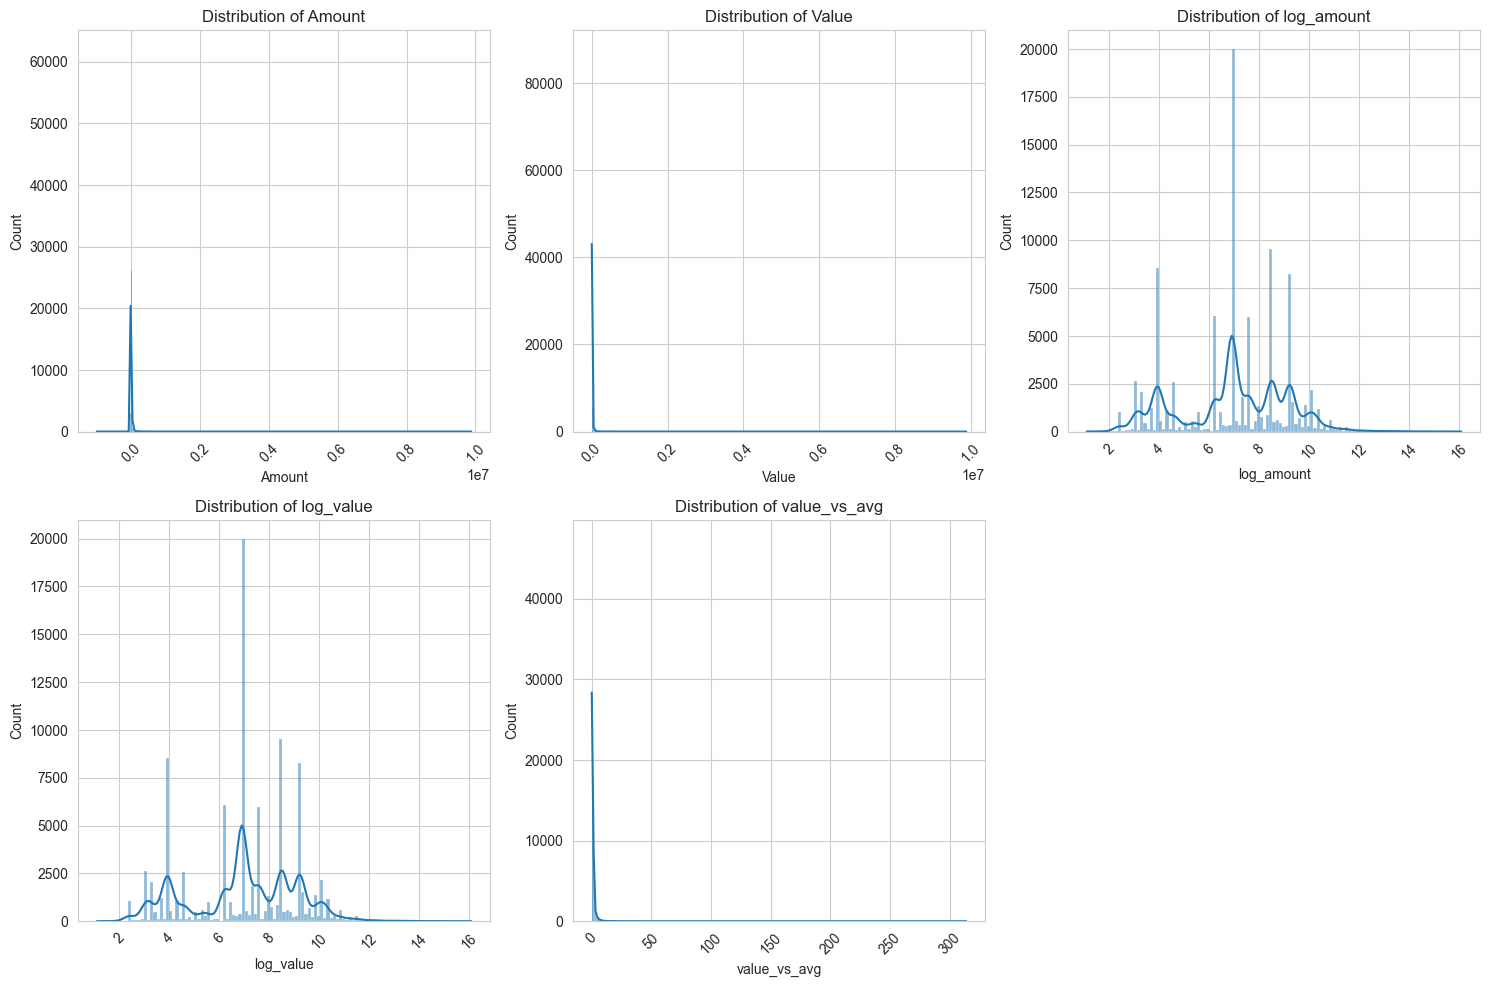

In [31]:
# Cell 1: Check numeric columns
numeric_cols = ['Amount', 'Value', 'log_amount', 'log_value', 'value_vs_avg']
print("Available numeric columns:", numeric_cols)

# Cell 2: Get descriptive statistics
print("\nDescriptive statistics for numeric columns:")
print(df[numeric_cols].describe())

# Cell 3: Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Categorical encoding

In [32]:
print("\nEncoded categorical columns:")
print(df[['is_credit', 'is_debit', 'is_weekend']].head())
print("\nTime of day categories:")
print(pd.get_dummies(df[['time_of_day']]).head())


Encoded categorical columns:
   is_credit  is_debit  is_weekend
0          1         0           0
1          0         1           0
2          1         0           0
3          1         0           0
4          0         1           0

Time of day categories:
   time_of_day_night  time_of_day_morning  time_of_day_afternoon  \
0               True                False                  False   
1               True                False                  False   
2               True                False                  False   
3               True                False                  False   
4               True                False                  False   

   time_of_day_evening  
0                False  
1                False  
2                False  
3                False  
4                False  


## Outlier Handling

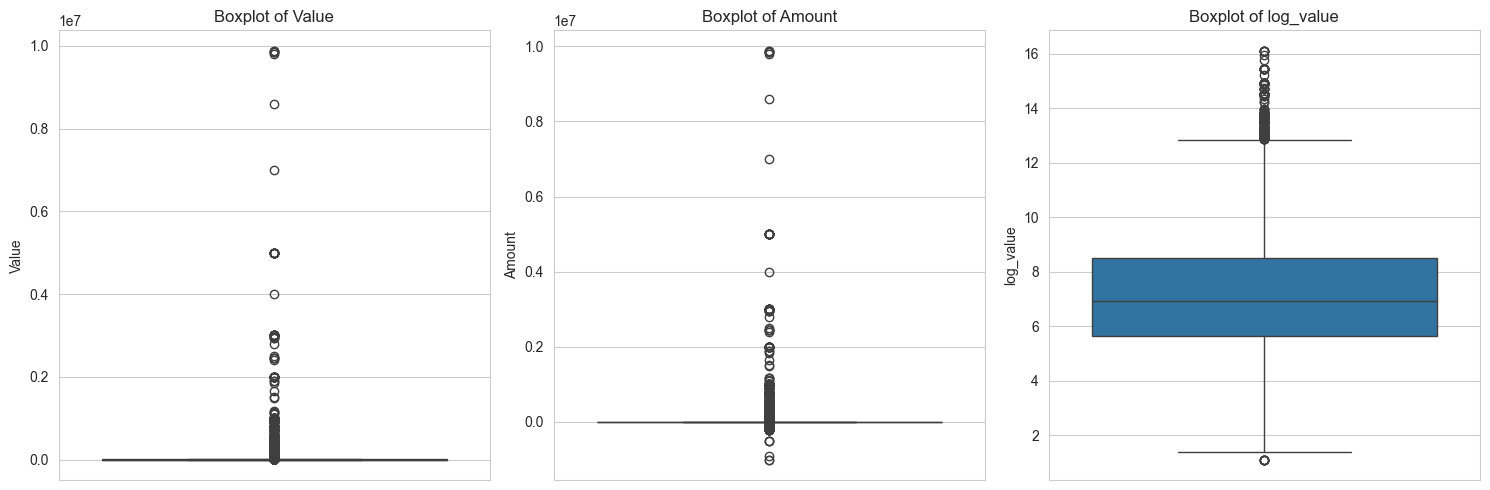

In [33]:
# Check for outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Value', 'Amount', 'log_value'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [34]:
# Cell 2: Function to detect and remove outliers using IQR
def remove_outliers(df, column, threshold=1.5):
    """
    Remove outliers using IQR method.
    Returns a cleaned DataFrame and the indices of removed outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Get indices of outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    # Remove outliers
    df_clean = df.drop(outlier_indices)
    
    print(f"Removed {len(outlier_indices)} outliers from {column} ({len(outlier_indices)/len(df)*100:.2f}%)")
    return df_clean, outlier_indices

# Cell 3: Apply to all numeric columns
df_clean = df.copy()
outlier_indices_all = set()

for col in ['Amount', 'Value', 'log_amount', 'log_value']:
    df_clean, outliers = remove_outliers(df_clean, col)
    outlier_indices_all.update(outliers)

print(f"\nTotal unique transactions removed: {len(outlier_indices_all)} ({(len(outlier_indices_all)/len(df)*100):.2f}%)")

Removed 24441 outliers from Amount (25.55%)
Removed 6948 outliers from Value (9.76%)
Removed 0 outliers from log_amount (0.00%)
Removed 0 outliers from log_value (0.00%)

Total unique transactions removed: 31389 (32.81%)


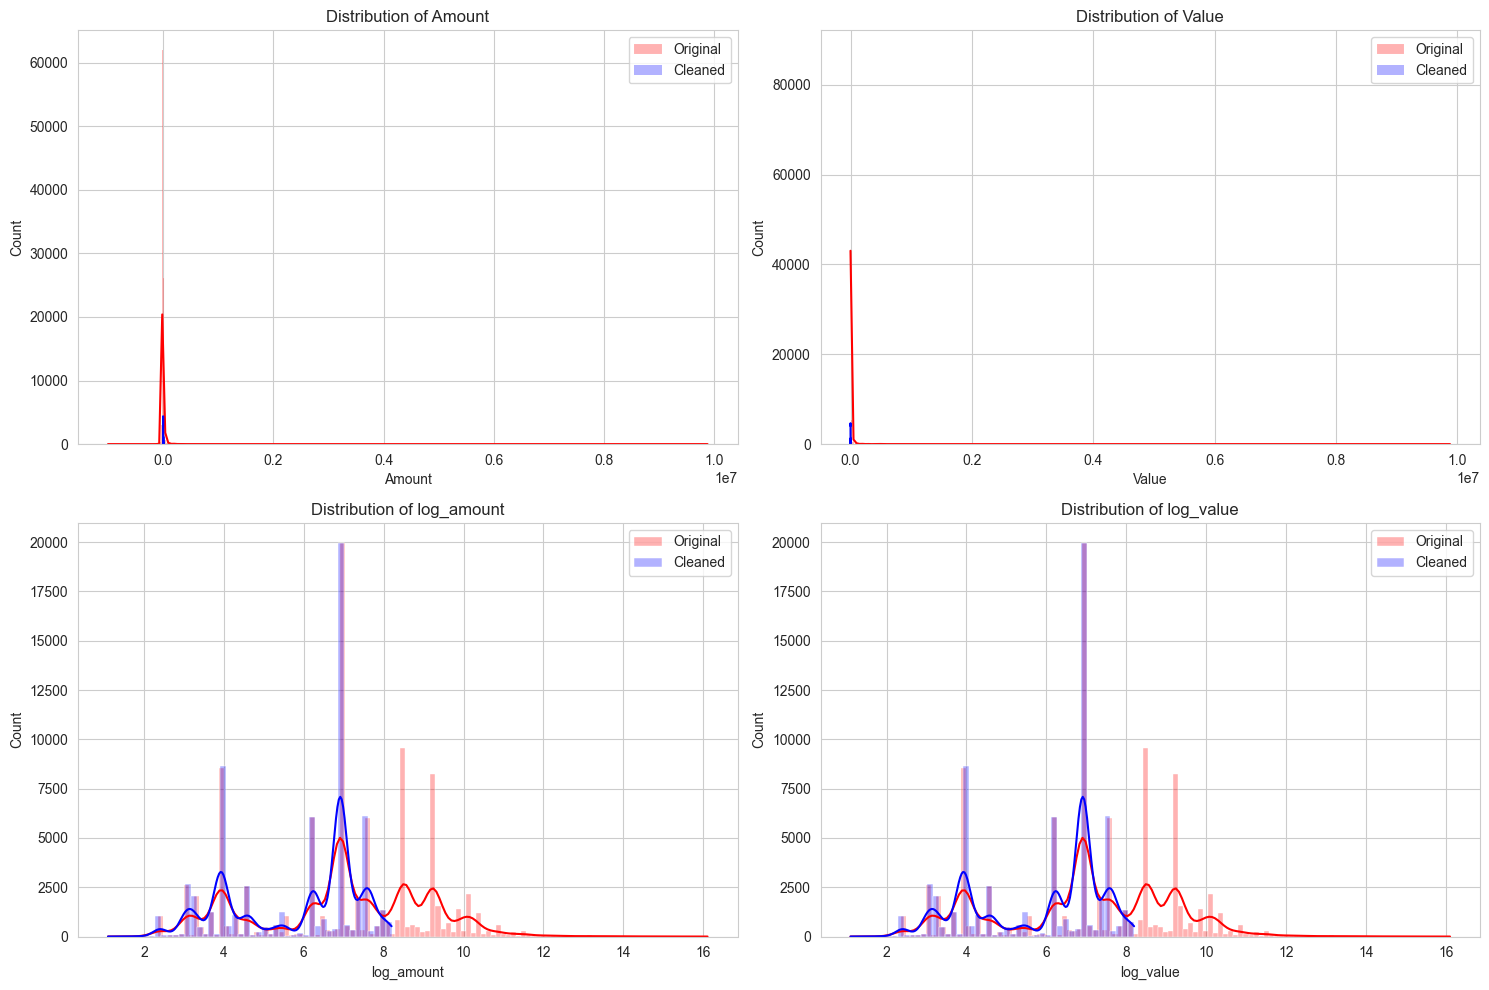

In [35]:
# Cell 4: Compare distributions before and after
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(['Amount', 'Value', 'log_amount', 'log_value']):
    sns.histplot(df[col], kde=True, color='red', alpha=0.3, ax=axes[i], label='Original')
    sns.histplot(df_clean[col], kde=True, color='blue', alpha=0.3, ax=axes[i], label='Cleaned')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [36]:
# Cell 6: Save cleaned data
output_path = '../data/processed/cleaned_transactions.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to ../data/processed/cleaned_transactions.csv


## Feature engineering

In [38]:
# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [39]:
# Cell 2: Load data
def load_data(filepath='../data/processed/cleaned_transactions.csv'):
    """Load and prepare the dataset."""
    df = pd.read_csv(filepath)
    print(f"Loaded data with shape: {df.shape}")
    return df

# Load the data
df = load_data()

# Display basic info
print("\nData types and missing values:")
print(df.info())

print("\nFirst few rows:")
display(df.head())

Loaded data with shape: (64273, 32)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64273 entries, 0 to 64272
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         64273 non-null  object 
 1   BatchId               64273 non-null  object 
 2   AccountId             64273 non-null  object 
 3   SubscriptionId        64273 non-null  object 
 4   CustomerId            64273 non-null  object 
 5   CurrencyCode          64273 non-null  object 
 6   CountryCode           64273 non-null  int64  
 7   ProviderId            64273 non-null  object 
 8   ProductId             64273 non-null  object 
 9   ProductCategory       64273 non-null  object 
 10  ChannelId             64273 non-null  object 
 11  Amount                64273 non-null  float64
 12  Value                 64273 non-null  int64  
 13  TransactionStartTime  64273 non-null  object 
 14  Pr

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionDate,TransactionHour,DayOfWeek,transaction_hour,transaction_day,transaction_weekday,transaction_month,transaction_year,is_weekend,is_credit,is_debit,log_amount,amount_bin,log_value,value_vs_avg,time_of_day
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2018-11-15,2,Thursday,2,15,3,11,2018,0,1,0,6.908755,low,6.908755,0.583771,night
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2018-11-15,2,Thursday,2,15,3,11,2018,0,0,1,3.044522,very_low,3.044522,0.011675,night
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2018-11-15,2,Thursday,2,15,3,11,2018,0,1,0,6.216606,low,6.216606,1.000000,night
3,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,2018-11-15,3,Thursday,3,15,3,11,2018,0,0,1,6.469250,low,6.469250,0.085380,night
4,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15 03:35:10+00:00,2,0,2018-11-15,3,Thursday,3,15,3,11,2018,0,1,0,7.601402,medium,7.601402,1.000000,night


In [44]:
# Cell 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # This is the missing import
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [45]:
# Cell 3: Feature Engineering
def create_feature_pipeline():
    """Create a feature engineering pipeline."""
    # Numeric features
    numeric_features = ['Amount', 'Value', 'log_amount', 'log_value']
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    # Categorical features
    categorical_features = ['ProductCategory', 'ChannelId', 'time_of_day']
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    # Combine transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    return preprocessor

# Initialize pipeline
preprocessor = create_feature_pipeline()
print("Feature engineering pipeline created successfully!")

Feature engineering pipeline created successfully!


## Splitting the data into train, validation and test

In [47]:
# Cell 1: Time-based split
from sklearn.model_selection import train_test_split
from datetime import datetime

# Sort by date first (if not already sorted)
df = df.sort_values('TransactionDate')

# Convert to datetime if needed
if not pd.api.types.is_datetime64_any_dtype(df['TransactionDate']):
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Split by time: 70% train, 15% validation, 15% test
train_size = 0.7
val_size = 0.15
test_size = 0.15

# First split: training vs (validation + test)
train, temp = train_test_split(
    df, 
    test_size=(1 - train_size), 
    shuffle=False,
    random_state=42
)

# Second split: validation vs test
val, test = train_test_split(
    temp,
    test_size=test_size/(val_size + test_size),
    shuffle=False,
    random_state=42
)

print(f"Training set: {len(train):,} rows ({len(train)/len(df):.1%})")
print(f"Validation set: {len(val):,} rows ({len(val)/len(df):.1%})")
print(f"Test set: {len(test):,} rows ({len(test)/len(df):.1%})")

Training set: 44,991 rows (70.0%)
Validation set: 9,641 rows (15.0%)
Test set: 9,641 rows (15.0%)


## Verify if there is data leakage or not

In [50]:
# Cell 3: Verify no data leakage
def check_leakage(df1, df2, customer_col='CustomerId', date_col='TransactionDate'):
    """Check for any data leakage between two DataFrames."""
    customers_leak = set(df1[customer_col]).intersection(set(df2[customer_col]))
    dates_leak = set(df1[date_col]).intersection(set(df2[date_col])) if date_col in df1.columns else set()
    
    print(f"Customers in both sets: {len(customers_leak)}")
    if date_col in df1.columns:
        print(f"Dates in both sets: {len(dates_leak)}")
    
    return len(customers_leak) > 0 or len(dates_leak) > 0

print("Train vs Val leakage:", check_leakage(train, val))
print("Train vs Test leakage:", check_leakage(train, test))
print("Val vs Test leakage:", check_leakage(val, test))

Customers in both sets: 0
Dates in both sets: 91
Train vs Val leakage: True
Customers in both sets: 0
Dates in both sets: 91
Train vs Test leakage: True
Customers in both sets: 0
Dates in both sets: 91
Val vs Test leakage: True


In [49]:
# First, get unique customers
unique_customers = df['CustomerId'].unique()

# Split customers into train, val, test
train_cust, temp_cust = train_test_split(
    unique_customers, 
    test_size=0.3,  # 70% train, 30% temp
    random_state=42
)

val_cust, test_cust = train_test_split(
    temp_cust,
    test_size=0.5,  # 15% val, 15% test
    random_state=42
)

# Create splits based on customer IDs
train = df[df['CustomerId'].isin(train_cust)].copy()
val = df[df['CustomerId'].isin(val_cust)].copy()
test = df[df['CustomerId'].isin(test_cust)].copy()

## Confirm the data distribution

In [51]:
# Check date ranges
print("Date Ranges:")
print(f"Train: {train['TransactionDate'].min()} to {train['TransactionDate'].max()}")
print(f"Val:   {val['TransactionDate'].min()} to {val['TransactionDate'].max()}")
print(f"Test:  {test['TransactionDate'].min()} to {test['TransactionDate'].max()}")

# Check customer distribution
print("\nCustomer Counts:")
print(f"Train customers: {train['CustomerId'].nunique():,}")
print(f"Val customers:   {val['CustomerId'].nunique():,}")
print(f"Test customers:  {test['CustomerId'].nunique():,}")

# Check for overlapping customers (should be 0)
train_customers = set(train['CustomerId'])
val_customers = set(val['CustomerId'])
test_customers = set(test['CustomerId'])

print("\nCustomer Overlaps:")
print(f"Train ∩ Val:   {len(train_customers.intersection(val_customers))}")
print(f"Train ∩ Test:  {len(train_customers.intersection(test_customers))}")
print(f"Val ∩ Test:    {len(val_customers.intersection(test_customers))}")

Date Ranges:
Train: 2018-11-15 00:00:00 to 2019-02-13 00:00:00
Val:   2018-11-15 00:00:00 to 2019-02-13 00:00:00
Test:  2018-11-15 00:00:00 to 2019-02-13 00:00:00

Customer Counts:
Train customers: 2,285
Val customers:   490
Test customers:  490

Customer Overlaps:
Train ∩ Val:   0
Train ∩ Test:  0
Val ∩ Test:    0


## Feature Engineering  pipeline

In [52]:
# Cell 1: Create a feature engineering pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define numeric and categorical features
numeric_features = ['Amount', 'log_amount', 'value_vs_avg']
categorical_features = ['ProductCategory', 'ChannelId', 'time_of_day']

# Numeric transformations
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformations
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Feature engineering pipeline created successfully!")

Feature engineering pipeline created successfully!


## Create A Target Variable

In [53]:
# Cell 2: Create target variable (example: predict if a transaction is high value)
# Modify this based on your specific use case
train['is_high_value'] = (train['Amount'] > train['Amount'].median()).astype(int)
val['is_high_value'] = (val['Amount'] > train['Amount'].median()).astype(int)  # Use train's median
test['is_high_value'] = (test['Amount'] > train['Amount'].median()).astype(int)

# Separate features and target
X_train = train.drop(columns=['is_high_value'])
y_train = train['is_high_value']
X_val = val.drop(columns=['is_high_value'])
y_val = val['is_high_value']
X_test = test.drop(columns=['is_high_value'])
y_test = test['is_high_value']

print("\nClass distribution:")
print("Train:", y_train.value_counts(normalize=True))
print("Validation:", y_val.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))


Class distribution:
Train: is_high_value
0    0.527392
1    0.472608
Name: proportion, dtype: float64
Validation: is_high_value
0    0.532818
1    0.467182
Name: proportion, dtype: float64
Test: is_high_value
0    0.545682
1    0.454318
Name: proportion, dtype: float64


## Fit and Transform Data

In [54]:
# Cell 3: Fit on training data and transform all sets
print("Fitting on training data...")
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Get feature names
numeric_features_processed = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)
categorical_features_processed = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = list(numeric_features_processed) + list(categorical_features_processed)

print("\nProcessed feature shapes:")
print(f"Train: {X_train_processed.shape}")
print(f"Val:   {X_val_processed.shape}")
print(f"Test:  {X_test_processed.shape}")

# Convert to DataFrame for better readability (optional)
X_train_df = pd.DataFrame(X_train_processed, columns=all_features, index=X_train.index)
print("\nProcessed training data sample:")
display(X_train_df.head())

Fitting on training data...

Processed feature shapes:
Train: (44375, 19)
Val:   (11503, 19)
Test:  (8395, 19)

Processed training data sample:


,Amount,log_amount,value_vs_avg,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night
425,-0.705660,-1.191955,-0.741869,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
426,-0.673238,-1.745682,-0.776019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
427,0.429106,0.665815,-0.395011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
428,0.429106,0.665815,0.288835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
429,-0.705660,-1.191955,-0.741869,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Save the preprocessor

In [55]:
# Cell 4: Save the preprocessor
import joblib

# Create directory if it doesn't exist
import os
os.makedirs('../models', exist_ok=True)

# Save the preprocessor
preprocessor_path = '../models/preprocessor.pkl'
joblib.dump(preprocessor, preprocessor_path)
print(f"\nPreprocessor saved to {preprocessor_path}")


Preprocessor saved to ../models/preprocessor.pkl


## Save the splitted data

In [57]:
# Create output directory
output_dir = Path('../data/processed/splits/')
output_dir.mkdir(parents=True, exist_ok=True)

# Save as CSV with compression
train_path = output_dir / 'train.csv.gz'
val_path = output_dir / 'val.csv.gz'
test_path = output_dir / 'test.csv.gz'

train.to_csv(train_path, index=False, compression='gzip')
val.to_csv(val_path, index=False, compression='gzip')
test.to_csv(test_path, index=False, compression='gzip')

print("Data saved successfully as compressed CSV files")

Data saved successfully as compressed CSV files
